In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from scoop import futures
import random
import numpy as np
from scipy import interpolate
# import matplotlib.pyplot as plt



In [2]:
# Read in data from CSV
dfData = pd.read_csv('../data/Wednesday-workingHours-withoutInfinity-Sampled.pcap_ISCX.csv')

print(dfData.groupby(' Label').size())

 Label
0    5000
1    5500
2    5500
3    5499
4    5796
dtype: int64


In [3]:
# change dfData column order
column = list(dfData.columns.values)
column.remove(' Destination IP')
column.remove(' Timestamp')
column.insert(2, ' Destination IP')
column.insert(3, ' Timestamp')

dfData = dfData[column]

In [4]:
# Encode the classification labels to numbers
# Get classes and one hot encoded feature vectors
le = LabelEncoder()
le.fit(dfData[' Label'])
allClasses = le.transform(dfData[' Label'])
allFeatures_full = dfData.drop([' Label'], axis=1)

# omit the first 4 features
allFeatures = allFeatures_full.iloc[:,4:]

In [5]:
# normalize
from sklearn.preprocessing import normalize

allFeatures = pd.DataFrame(normalize(allFeatures, axis=1, copy=True, return_norm=False), columns=column[4:-1])

In [6]:
## every value goes up by 1, due to the chi2 condition
allFeatures += 1

In [7]:
# Form training, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(allFeatures, allClasses, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest, test_size=0.20, random_state=42)

In [8]:
# original lr
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# clf_svm = svm.SVC()
# clf_svm.fit(X_train, y_train)

# y_pred = clf_svm.predict(X_train)
# acc = metrics.accuracy_score(y_train, y_pred)
# print("Training score: {}".format(acc))

clf_svm = LogisticRegression()
clf_svm.fit(X_train, y_train)

y_pred = clf_svm.predict(X_train)
acc = metrics.accuracy_score(y_train, y_pred)
print("Training score: {}".format(acc))

Training score: 0.8660980077856653


In [9]:
y_pred = clf_svm.predict(X_validation)
acc = metrics.accuracy_score(y_validation, y_pred)
print("Validation score: {}".format(acc))

Validation score: 0.8670086096354643


In [11]:
# go through all possible # of features
k = [index for index in range(80,0,-1)]

from collections import defaultdict
test_acc = defaultdict(list)
train_acc = defaultdict(list)
val_acc = defaultdict(list)

In [12]:
from sklearn.feature_selection import RFE

for item in k:
    
    print("# of features selected: ", item)
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=item)
    rfe.fit(X_train,y_train)

    train_acc[item].append(rfe.score(X_train, y_train)) 
    test_acc[item].append(rfe.score(X_test,y_test)) 
    val_acc[item].append(rfe.score(X_validation,y_validation))
#     print("these features are:")
#     names_features = rfe.get_support(True)
#     for item in (names_features):
#         print(column[item])
    
    print("________________________________________")
    

# of features selected:  80
________________________________________
# of features selected:  79
________________________________________
# of features selected:  78
________________________________________
# of features selected:  77
________________________________________
# of features selected:  76
________________________________________
# of features selected:  75
________________________________________
# of features selected:  74
________________________________________
# of features selected:  73
________________________________________
# of features selected:  72
________________________________________
# of features selected:  71
________________________________________
# of features selected:  70
________________________________________
# of features selected:  69
________________________________________
# of features selected:  68
________________________________________
# of features selected:  67
________________________________________
# of features selected:  66
______

In [13]:
df_testAccuracyList = pd.DataFrame(test_acc, columns=["testAccuracy"])
df_testAccuracyList.to_csv('./wrapper_rfe_results/testAccuracyList.csv', index=False)

df_validationAccuracyList = pd.DataFrame(val_acc, columns=["validationAccuracy"])
df_validationAccuracyList.to_csv('./wrapper_rfe_results/validationAccuracyList.csv', index=False)

df_validationAccuracyList = pd.DataFrame(train_acc, columns=["trainAccuracy"])
df_validationAccuracyList.to_csv('./wrapper_rfe_results/trainAccuracyList.csv', index=False)

In [19]:
features_num = list(val_acc.keys())
features_val = list(val_acc.values())

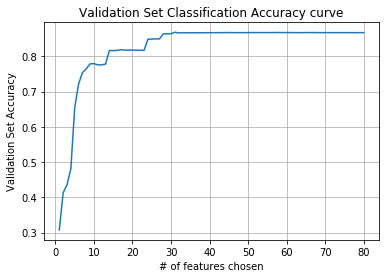

In [23]:
import matplotlib.pyplot as plt

g = plt.figure(5)
plt.plot(features_num, features_val)
plt.title('Validation Set Classification Accuracy curve')
plt.xlabel('# of features chosen')
plt.ylabel('Validation Set Accuracy')
plt.grid()

In [27]:
np.max(features_val)

0.8682908957684558

In [26]:
features_val

[[0.8670086096354643],
 [0.8673749771020334],
 [0.8670086096354643],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8675581608353178],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8673749771020334],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8673749771020334],
 [0.8671917933687489],
 [0.8671917933687489],
 [0.8670086096354643],
 [0.8670086096354643],
 [0.8670086096354643],
 [0.8668254259021799],
 [0.8668254